In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
Signal1 = pd.read_csv("signal1.csv",header=None)
Signal2 = pd.read_csv("signal2.csv",header=None)
Signal3 = pd.read_csv("signal3.csv",header=None)
Signal4 = pd.read_csv("signal4.csv",header=None)
Signal5 = pd.read_csv("signal5.csv",header=None)
Signal6 = pd.read_csv("signal6.csv",header=None)
Dataframe = pd.concat([Signal1,Signal2,Signal3,Signal4,Signal5,Signal6],axis=1,ignore_index=True)

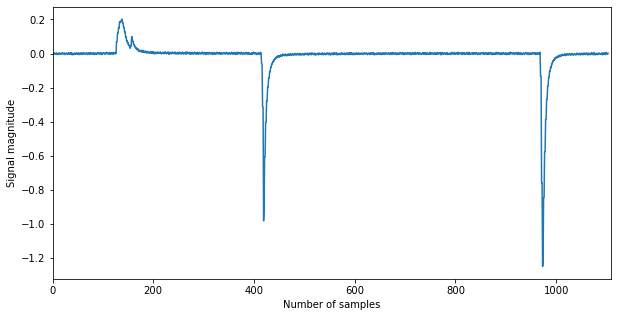

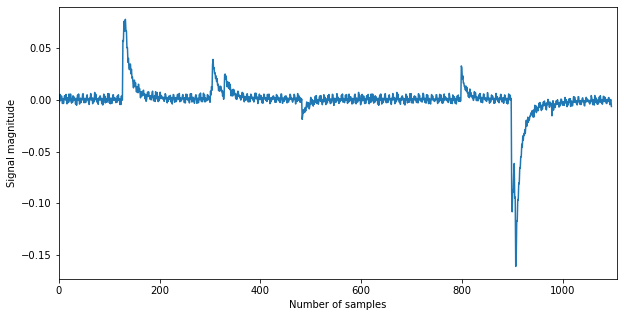

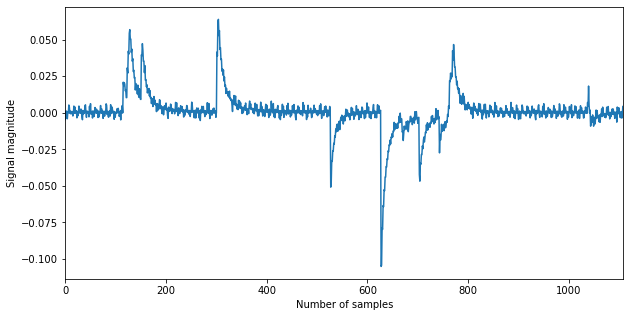

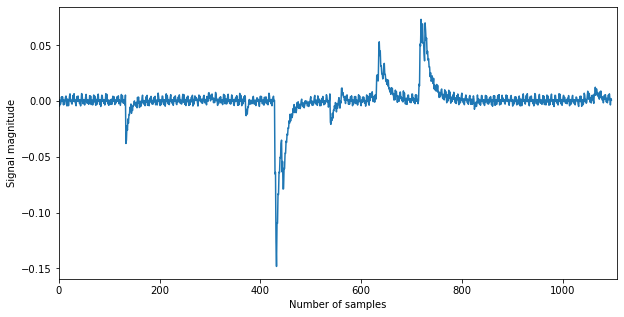

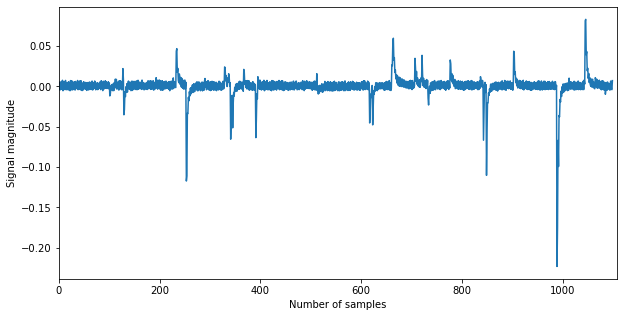

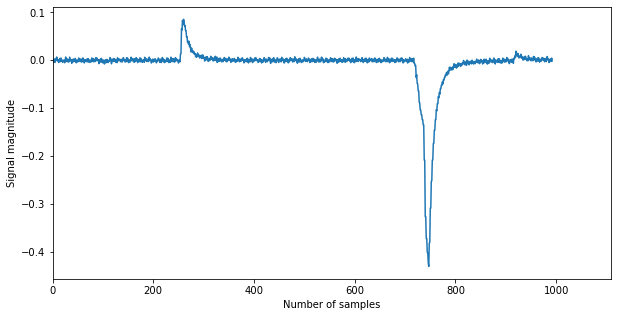

In [3]:
figs = {}
axs = {}
for i in range(Dataframe.shape[1]):
    figs[i] = plt.figure(figsize=(10,5))
    axs[i] =figs[i].add_subplot(111)
    axs[i].plot(Dataframe[i])  
    axs[i].set_xlim(0,Dataframe[i].shape[0])
    axs[i].set_ylabel('Signal magnitude')
    axs[i].set_xlabel('Number of samples')   

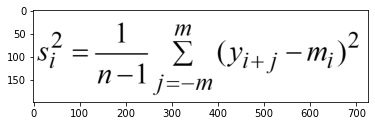

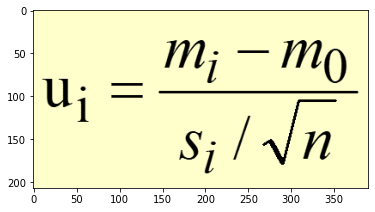

In [4]:
image = mpimg.imread("variancecomparison.png")
plt.imshow(image)
plt.show()
image = mpimg.imread("meancomparison.png")
plt.imshow(image)
plt.show()

In [5]:
def fault_detection(signal,threshold,windowsize):
    X = signal[:60]
    mean_flux0 = np.mean(X)
    decision_mean = []
    time = []
    mean_comparison = []
    for window in range(windowsize,signal.shape[0]+1):
        a = (np.mean(signal[window-window_size:window]) - mean_flux0)
        b = (np.std(signal[window-window_size:window]))/(np.sqrt(window_size))
        u = a/b
        mean_comparison.append(u)
        if ((u >= threshold).bool() | (u <= -threshold).bool()): #threshold
            decision_mean.append(1)
            time.append(window - int(window_size/2)) 
        else:
            decision_mean.append(0)        
            
    return decision_mean, mean_comparison,time

In [6]:
signal = Signal1  # 6 signals (0...5)
threshold = 3
window_size = 20
decision_mean,mean_comparison,time = fault_detection(signal,threshold,window_size)

In [20]:
signal

,0
0,-0.006226
1,-0.000366
2,-0.005493
3,0.004517
4,0.003052
...,...
1099,0.006470
1100,0.001831
1101,-0.002197
1102,-0.004822


In [22]:
signal[0][1]

-0.000366

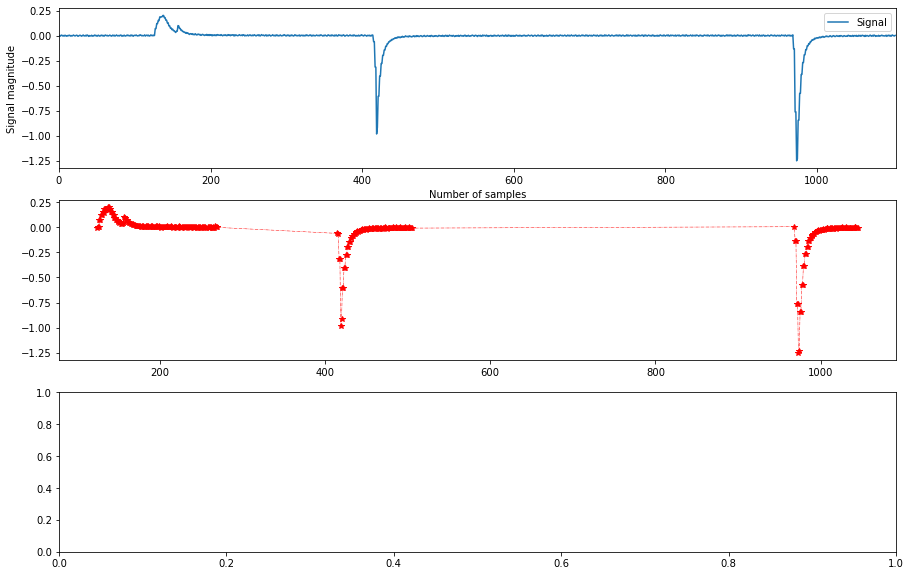

In [23]:
fig,axs = plt.subplots(3,1,figsize=(15,10))
axs = axs.reshape(-1)
axs[0].plot(signal,label='Signal')
axs[0].set_xlim(0,signal.shape[0])
axs[0].set_xlabel('Number of samples')
axs[0].set_ylabel('Signal magnitude')
axs[0].legend(loc=0)

axs[1].plot(time,signal[0][time],'-.*',color='r',linewidth=0.5,label='Signal')
#axs[1].plot(decision_mean,color='b',linewidth=0.5,label='Decision')




